In [19]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# define the number of samples
n_samples = 100000

In [21]:
# define the box
x_min = 0
x_max = 10

y_min = 0
y_max = 10

In [22]:
# create a dataframe with the positions of the 2 points in the box
coordinates = pd.DataFrame({
    "spot_1_x": [rd.uniform(x_min, x_max) for _ in range(n_samples)],
    "spot_1_y": [rd.uniform(y_min, y_max) for _ in range(n_samples)],
    "spot_2_x": [rd.uniform(x_min, x_max) for _ in range(n_samples)],
    "spot_2_y": [rd.uniform(y_min, y_max) for _ in range(n_samples)],
})


In [23]:
coordinates["dist_x0"] = coordinates["spot_1_x"]
coordinates["dist_xmax"] = x_max - coordinates["spot_1_x"]
coordinates["dist_y0"] = coordinates["spot_1_y"]
coordinates["dist_ymax"] = y_max - coordinates["spot_1_y"]


coordinates["nearest_side"] = np.argmin(
    coordinates[["dist_x0", "dist_xmax", "dist_y0", "dist_ymax"]].values, axis=1
)

side_labels = {0: "x=0", 1: "x=x_max", 2: "y=0", 3: "y=y_max"}
coordinates["nearest_side"] = coordinates["nearest_side"].map(side_labels)

# Drop intermediate distance columns if no longer needed
coordinates.drop(columns=["dist_x0", "dist_xmax", "dist_y0", "dist_ymax"], inplace=True)


In [24]:
coordinates["middle_point_x"] = (coordinates["spot_1_x"]+coordinates["spot_2_x"])/2
coordinates["middle_point_y"] = (coordinates["spot_1_y"]+coordinates["spot_2_y"])/2

coordinates["grad_between_points"] = (coordinates["spot_1_y"]-coordinates["spot_2_y"])/(coordinates["spot_1_x"]-coordinates["spot_2_x"])

coordinates["inverse_grad"] = -1/coordinates["grad_between_points"]


In [25]:
coordinates_x_0 = coordinates[coordinates["nearest_side"] == "x=0"]

# Use y-y_1 = m(x-x_1) to find the y intercept (y) where x = 0, m = inverse_grad, (x_1,y_1) is the midpoint.
coordinates_x_0["intercept_point"] = coordinates_x_0["inverse_grad"]*(-1)*coordinates_x_0["middle_point_x"] + coordinates_x_0["middle_point_y"]

num_rows = coordinates_x_0.shape[0]


valid_points = coordinates_x_0[
    (coordinates_x_0["intercept_point"] < y_max) &
    (coordinates_x_0["intercept_point"] >= y_min)
]

num_valid = valid_points.shape[0]

prob = num_valid / num_rows

print(prob)

0.48723693686484754


C:\Users\james\AppData\Local\Temp\ipykernel_16848\390747933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates_x_0["intercept_point"] = coordinates_x_0["inverse_grad"]*(-1)*coordinates_x_0["middle_point_x"] + coordinates_x_0["middle_point_y"]


In [28]:
valid_points = valid_points[valid_points["spot_1_y"]<=y_max/2]

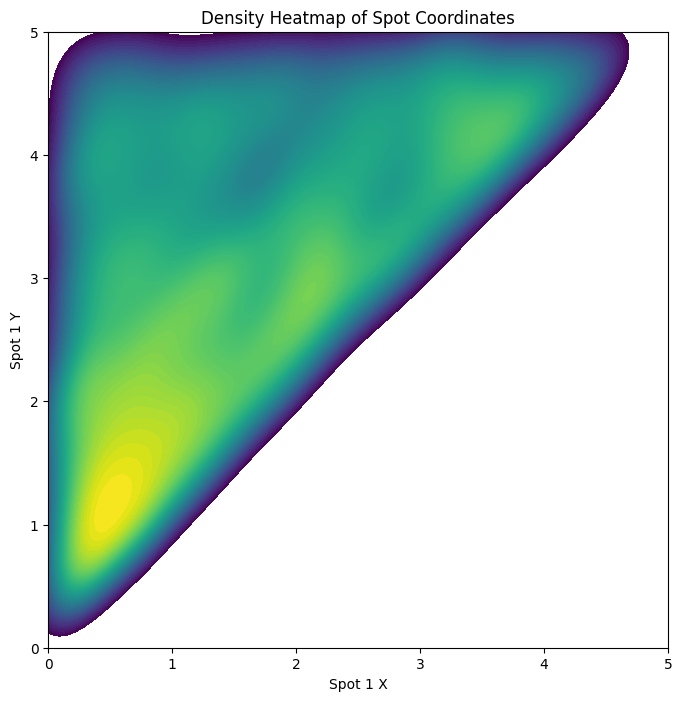

In [ ]:
# plot a density heatmap of valid_points["spot_1_x"], valid_points["spot_1_y"] on a 2 by 2 graph. Axis ranging from 0 to x_max and y_max resectively

# Set figure size
plt.figure(figsize=(8, 8))  
sns.kdeplot(
    x=valid_points["spot_1_x"],
    y=valid_points["spot_1_y"],
    cmap="viridis",
    fill=True,
    levels=100,
    thresh=0.1
)

# Set the x and y axis limits
plt.xlim(0, x_max/2)
plt.ylim(0, y_max/2)

# Add labels and title
plt.xlabel("Spot 1 X")
plt.ylabel("Spot 1 Y")
plt.title("Density Heatmap of Spot Coordinates")

# Show the plot
plt.show()